In [1]:
# Importing usefull libraries and removing warning

from causalnex.structure.notears import from_pandas
import sys
import warnings
import pandas as pd

sys.path.append('..')

warnings.filterwarnings('ignore')

/home/micky/anaconda3/envs/causal_new/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Importing the useful modules from scripts folder

from scripts import vizualization as viz
from scripts import utils

In [3]:
# Loading and reading the data

df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,concave points_mean,radius_worst,concave points_worst,perimeter_worst,area_mean,perimeter_mean,radius_mean,diagnosis
0,0.429309,0.364519,0.535542,0.392431,0.213584,0.320604,0.305953,1.0
1,0.233319,0.406018,0.427609,0.361139,0.335565,0.411960,0.430264,1.0
2,0.395136,0.345844,0.519059,0.316042,0.279353,0.370308,0.373883,1.0
3,0.461150,0.219003,0.780439,0.212861,0.090760,0.205942,0.185294,1.0
4,0.354198,0.355124,0.381549,0.346380,0.334315,0.431132,0.430384,1.0


In [4]:
# Spliting the training data into train and hold_out dataset

df_train = df.head(int(0.8*len(df)))
df_hold = df.tail(int(0.2*len(df)))

In [5]:
# Sampling the data for causal analysis

sample_20 = df_train.sample(int(0.2*len(df_train)), random_state=2)
sample_40 = df_train.sample(int(0.4*len(df_train)), random_state=2)
sample_60 = df_train.sample(int(0.6*len(df_train)), random_state=2)
sample_80 = df_train.sample(int(0.8*len(df_train)), random_state=2)

In [6]:
# Creating structure model for all the data fraction
# sm is the ground truth

sm = from_pandas(df_train,w_threshold=0.8)
sm_20 = from_pandas(sample_20,w_threshold=0.8)
sm_40 = from_pandas(sample_40,w_threshold=0.8)
sm_60 = from_pandas(sample_60,w_threshold=0.8)
sm_80 = from_pandas(sample_80,w_threshold=0.8)

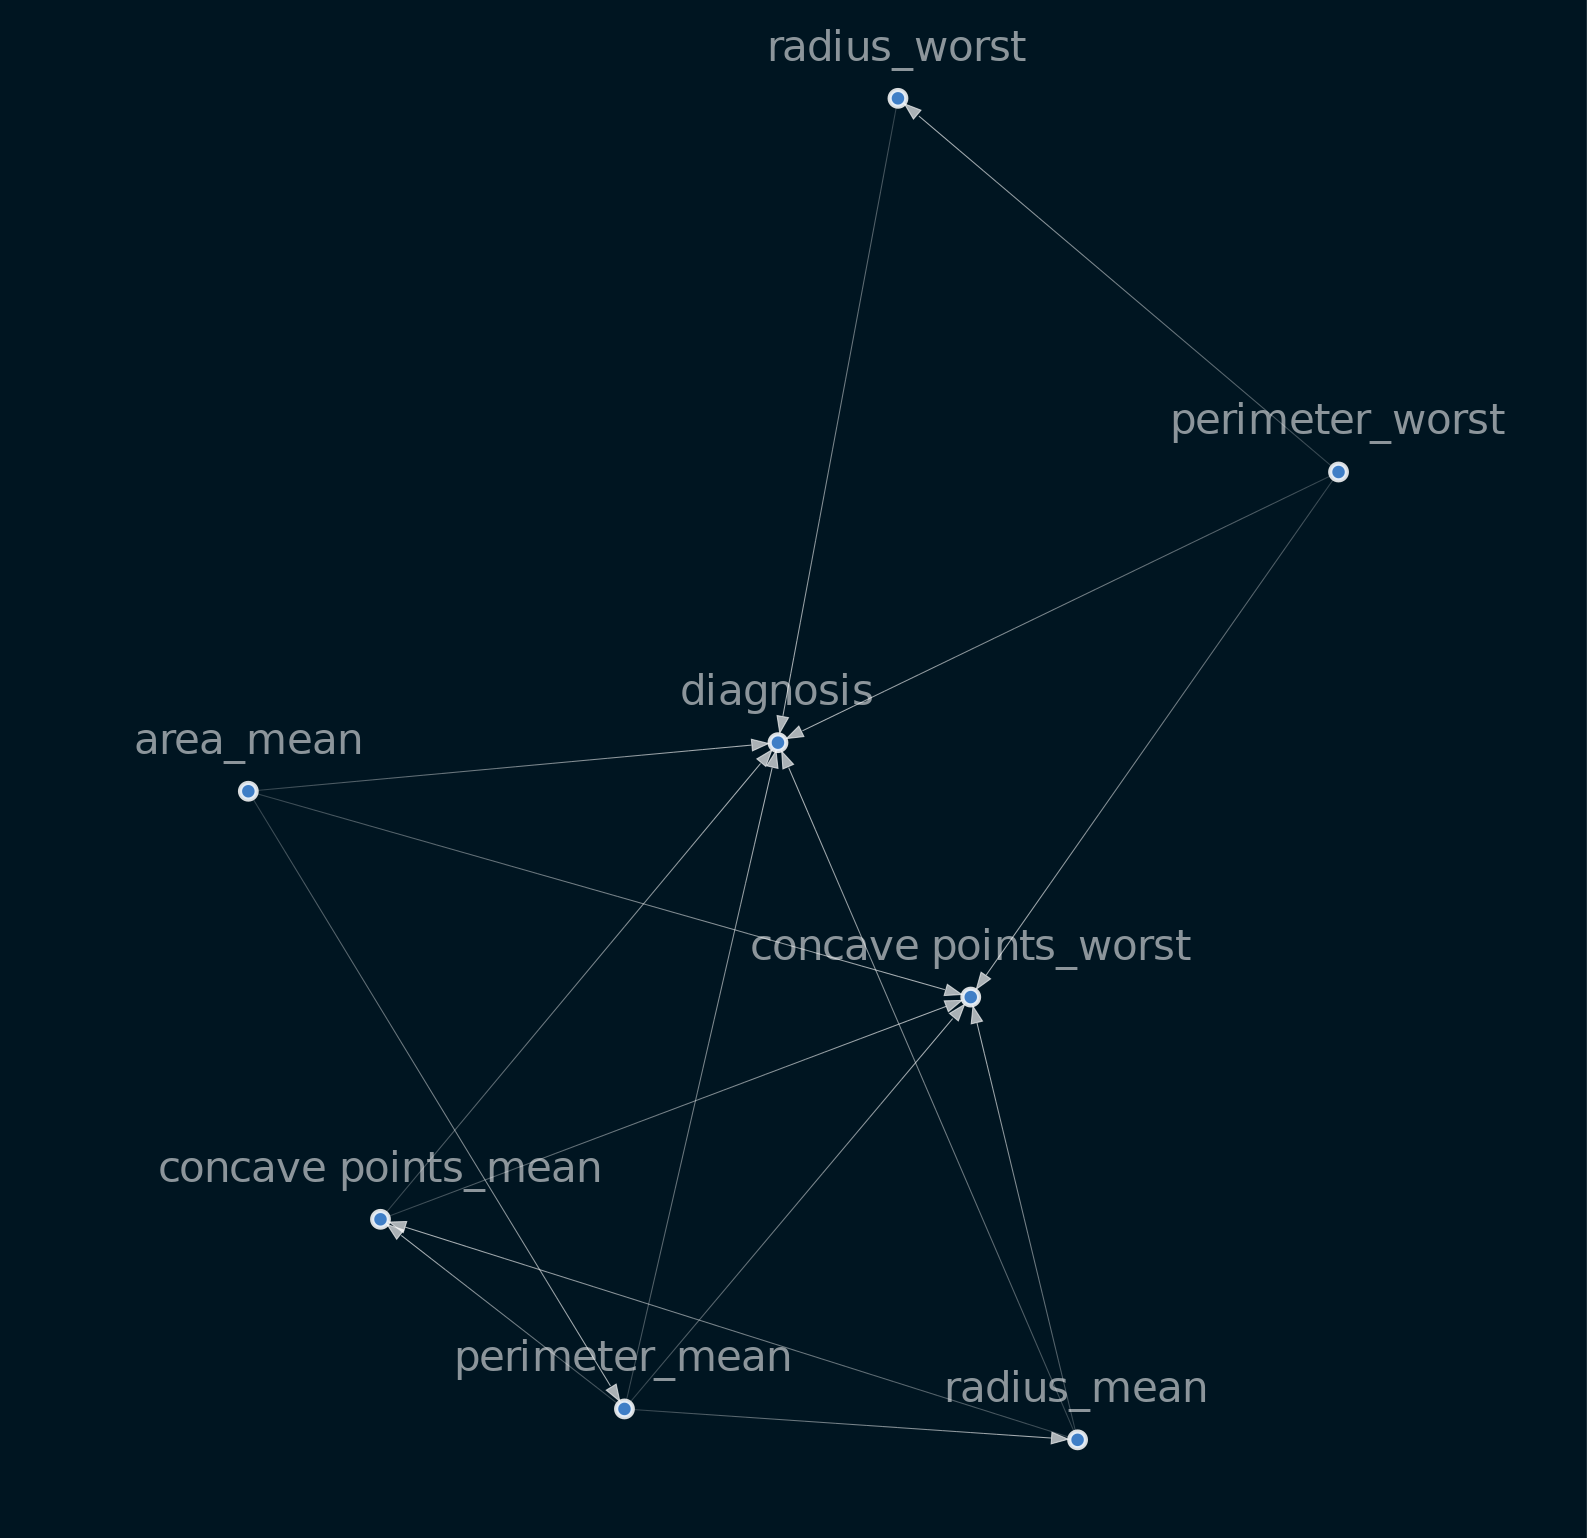

In [7]:
# Vizualizing the causal graph of the ground truth

viz.plot_causal(sm)

In [8]:
# Finding the jaccard simillarity between our 20% fraction data and the ground truth

utils.jaccard_similarity(sm,sm_20)

The jaccard simillarity between StructureModel with 8 nodes and 16 edges and StructureModel with 8 nodes and 17 edges is 0.833


In [9]:
# Finding the jaccard simillarity between our 40% fraction data and the ground truth

utils.jaccard_similarity(sm,sm_40)

The jaccard simillarity between StructureModel with 8 nodes and 16 edges and StructureModel with 8 nodes and 16 edges is 0.882


In [10]:
# Finding the jaccard simillarity between our 60% fraction data and the ground truth

utils.jaccard_similarity(sm,sm_60)

The jaccard simillarity between StructureModel with 8 nodes and 16 edges and StructureModel with 8 nodes and 14 edges is 0.875


In [11]:
# Finding the jaccard simillarity between our 80% fraction data and the ground truth

utils.jaccard_similarity(sm,sm_80)

The jaccard simillarity between StructureModel with 8 nodes and 16 edges and StructureModel with 8 nodes and 15 edges is 0.938


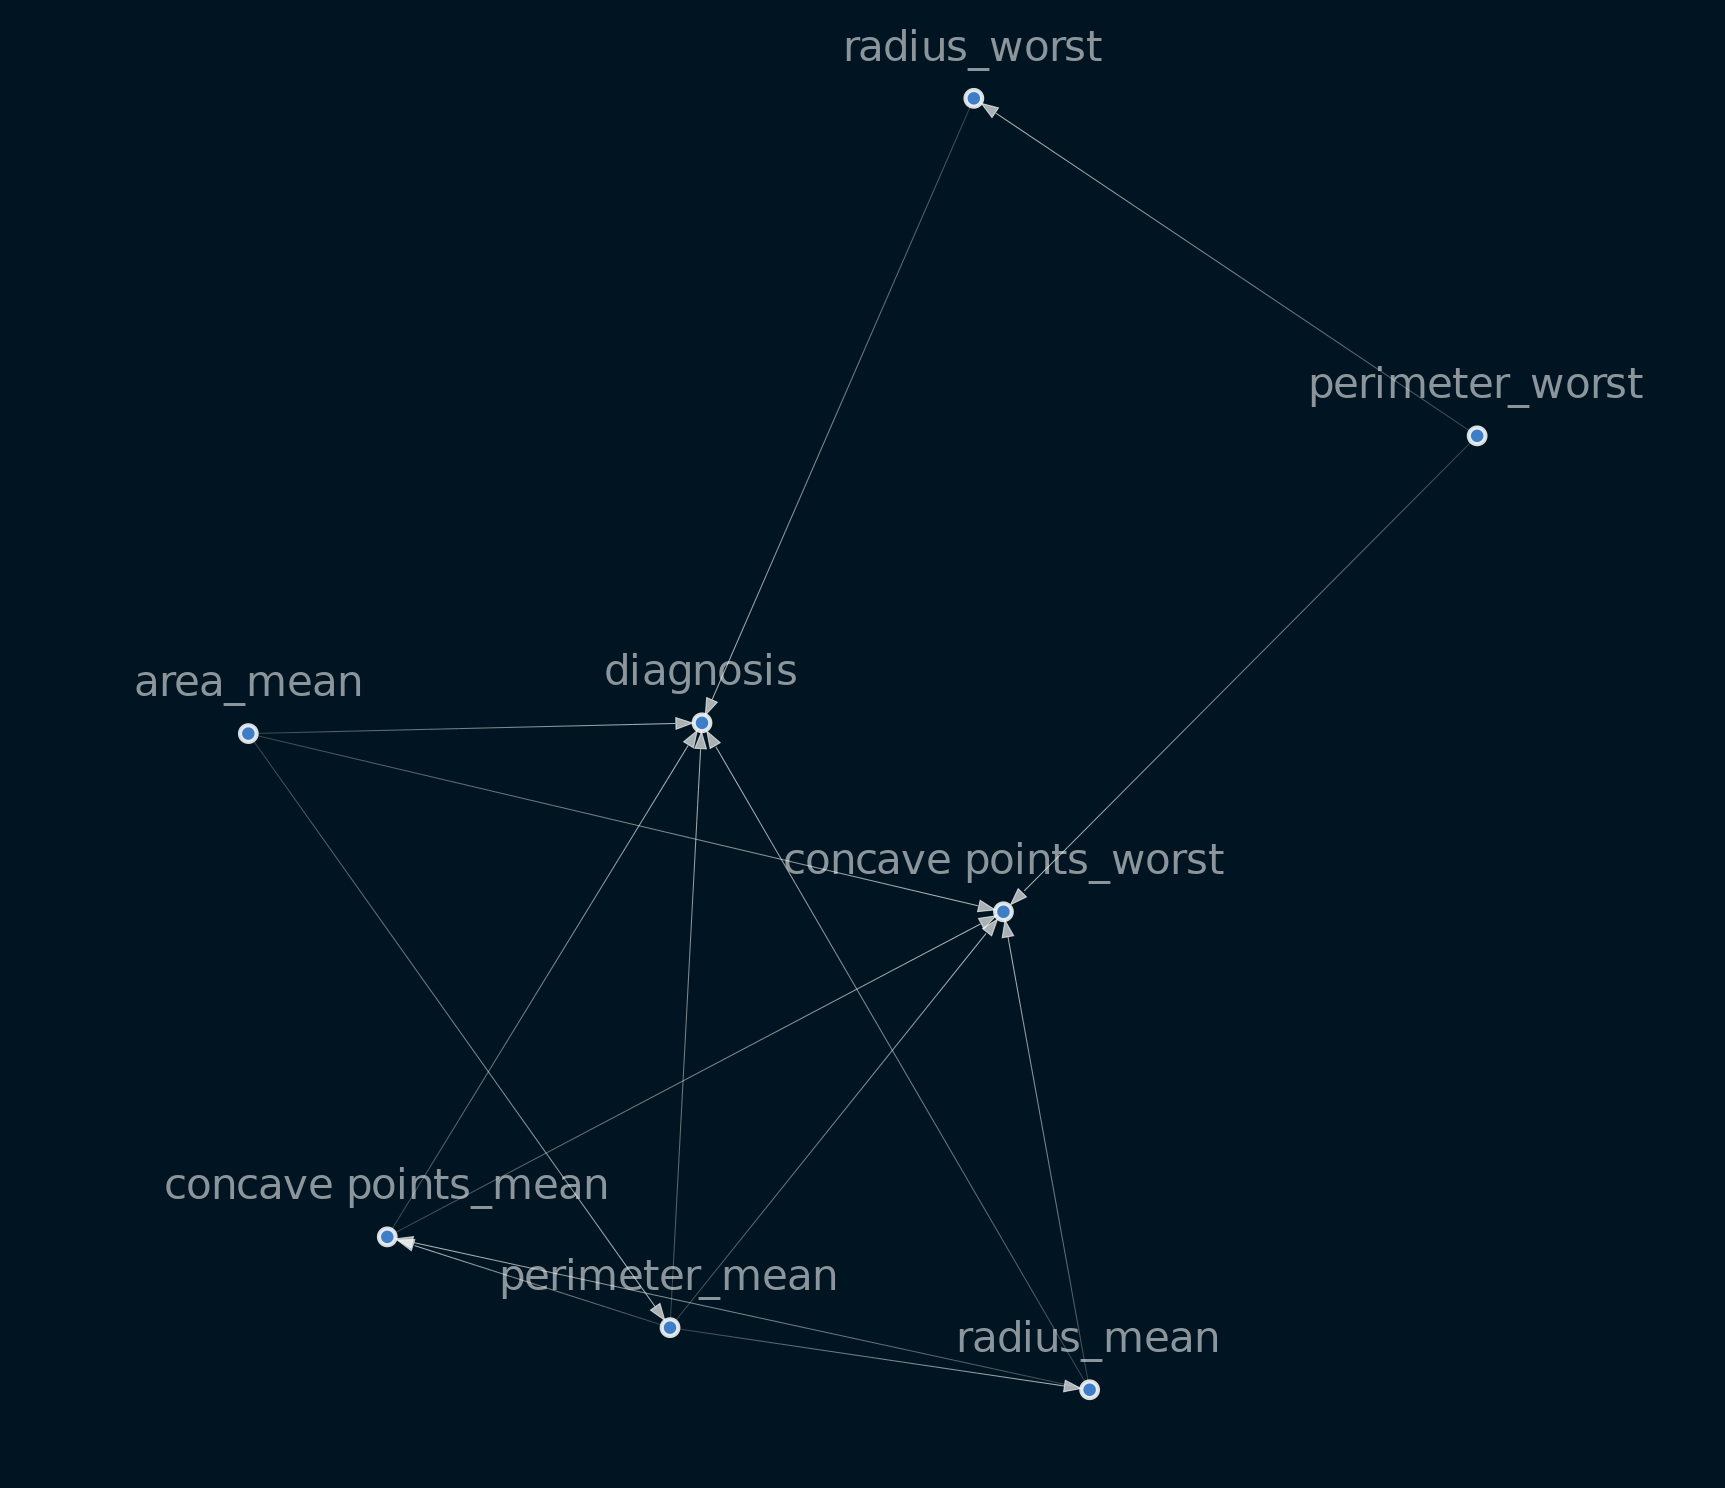

In [12]:
# Vizualizing the stable causal graph

viz.plot_causal(sm_80)

### From the above we can see that the stable graph is the 80% fraction and we can see that the directly affecting features are 5 these are: area_mean, concave points_mean , perimeter_mean, radius_mean, radius_worst

In [13]:
# Creating a dataframe after identifying the causal inference

causal_selected_columns = ['area_mean', 'concave points_mean', 'perimeter_mean', 'radius_mean', 'radius_worst']
causal_selected_df = sample_80[causal_selected_columns]
causal_selected_df['diagnosis'] = sample_80['diagnosis']
causal_selected_df.head(3)

,area_mean,concave points_mean,perimeter_mean,radius_mean,radius_worst,diagnosis
174,0.284902,0.000000,0.533727,0.567441,0.418520,0.0
267,0.283325,0.170322,0.479481,0.500423,0.391000,0.0
223,0.252157,0.309039,0.391045,0.399342,0.398101,1.0


In [14]:
# Saving the dataframe after causal inference into csv file

causal_selected_df.to_csv('../data/causal_inference_data.csv',index=False)

In [15]:
# Saving the hold dataset into csv file

df_hold.to_csv('../data/hold_out_data.csv',index=False)

In [16]:
# Creating a hold dataframe by using the features we got from the causal graph

causal_selected_hold_out_df = df_hold[causal_selected_columns]
causal_selected_hold_out_df['diagnosis'] = df_hold['diagnosis']
causal_selected_hold_out_df.head(3)

,area_mean,concave points_mean,perimeter_mean,radius_mean,radius_worst,diagnosis
456,0.235849,0.205227,0.439682,0.450440,0.377975,0.0
457,0.287225,0.176466,0.478246,0.506147,0.392113,0.0
458,0.282159,0.154642,0.473704,0.503031,0.402668,0.0


In [17]:
# Saving the causal inferred hold out data into csv file

causal_selected_hold_out_df.to_csv('../data/causal_hold_out_data.csv',index=False)